# Exercise 3.1: Diffusion, Entropy and the Arrow of Time

The goal of this exercise is to simulate (in 2D), the diffusion of a square drop of cream in a square cup of coffee via a random walk approach. 

You will need to consider $N$ particles executing a random walk on a 2D square lattice (sides at $x=\pm 100$, $y=\pm 100$), allowing multiple occupancy for a lattice site.  

You should assume that there are walls at $x=\pm 100$, $y=\pm 100$. 

(a) Start by modifying the ```Walker``` class given during the lectures to only allow motion along a 2D grid. You will also need to consider the space case of reaching the walls of the cup. 

Create a ```position()``` function as a member of this class that tells you where the grid walker is on the 2D grid. 


## Solution (a)

The implementation of this class is fairly simple. We modify the move function to constrain the particles to motion on the grid using two random numbers: one to tell the particle which axis to move along and the other to tell the particle which direction. We also need to check if a particle is located at the boundary of the cup. I do this with a series of if statements, which send the particle directly away from the wall if triggered. This may not be the most accurate way to model the diffusion, but it is certainly easier to implement the code this way. In principle the more accurate model would involving another random number for the boundary case. But I think that would be too cumbersome.

In [4]:
import random
import math 
import numpy as np

# take the Walker class and modify it to work on a grid only!
class GridWalker:
    """A random walker class for walkers on a grid"""
    # instantiations of this class are initialized with an initial position and the limits within which they will be able to move
    def __init__(self, initialx, initialy, limitx, limity):
        # only accept positive or negative integers as initial positions for the grid walker
        if isinstance(initialx, int) is False or isinstance(initialy, int) is False:
            raise Exception('Wakers have to be initialized with integer positions')
        # initialize the position of the walker
        self.x = initialx
        self.y = initialy
        # initialize the limits
        self.lx = limitx
        self.ly = limity
        # keep all the positions that the walker has moved through in a list:
        self.allx = []
        self.ally = []
        self.allx.append(initialx)
        self.ally.append(initialy)
  

    # now let's create a function that allows us to take random steps in a random direction on the grid:
    def move(self):
        direction = random.randint(0,1)
        # check the various limits of the cup and move away from the wall
        if self.x == self.lx:
            dx = -1
            dy = 0
        elif self.x == -self.lx:
            dx = 1
            dy = 0
        elif self.y == self.ly:
            dx = 0
            dy = -1
        elif self.y == -self.ly:
            dx = 0
            dy = 1
        # if none of the boundary cases are satisfied, we can move to the "normal" motion of the walker
        else:
            if direction == 0:
                dx = 2*random.randint(0,1)-1
                dy = 0
            else:
                dx = 0
                dy = 2*random.randint(0,1)-1
        self.x = self.x + dx
        self.y = self.y + dy
        self.allx.append(self.x)
        self.ally.append(self.y)
        
    # get the current position
    def position(self):
        return [self.x,self.y]

In [60]:
# Test the GridWalker class here: 
gridWalker1 = GridWalker(0,0, 100, 100)
gridWalker1.move()
print(gridWalker1.position())

[1, 0]


(b) Next, use the matplotlib animation given in the lectures to construct an animation of the evolution of $N=400$ walkers for $n=10^4$ steps, initially distributed randomly within a square defined by $x=\pm 20$ and $y=\pm 20$. 

## Solution (b)

This problem is a matter of copying the code from the lecture and tweaking the parameters around a bit.

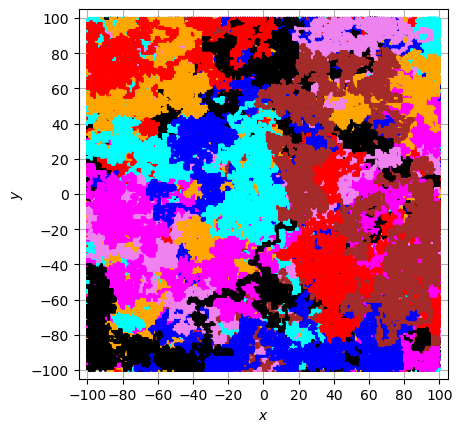

100%|██████████| 10000/10000 [01:15<00:00, 131.74it/s]


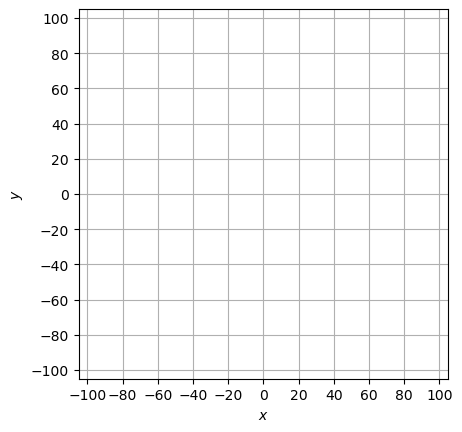

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time # various time functions
from tqdm import tqdm # progress bar
import matplotlib.ticker as ticker # 

# this allows us to access dynamic updating of the plot: 
from IPython import display
from IPython.display import clear_output

# setup the axis:
fig,ax = plt.subplots(1,1)

#get the dynamic display:
dynamicdisplay = display.display("", display_id=True)

# put a grid on the graph:
ax.grid(True, which='both')

# set the aspect ratio to 1:
ax.set_aspect(1)

# set some parameters here:
n = 400 # the number of walkers
N = 10000 # the number of steps
step = 1 # the step size
Nupdate = 500 # the frequency of steps used to update the plot

# set the labels and limits:
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
limitsize = 105
ax.set_xlim(-limitsize,limitsize)
ax.set_ylim(-limitsize,limitsize)

# set the major ticks to correspond to twice step size:
ax.xaxis.set_major_locator(ticker.MultipleLocator(20*step))
ax.yaxis.set_major_locator(ticker.MultipleLocator(20*step))

# initialize n walkers and put them in a list:
WalkerList = []
WalkerColor = [] # create a list with the colors of each walker 
colors = [ 'green', 'orange', 'red', 'magenta', 'blue', 'cyan', 'black', 'brown', 'violet'] # 9 colours
j = 0 # counter to make sure we don't go over the 9 colors
for w in range(n): 
    WalkerList.append(GridWalker(random.randint(-20,20),random.randint(-20,20),100,100))
    # set the color of each walker. If we w exceeds 8 then reset the counter j:
    if w-8*j > 8:
        j = j + 1
    else: 
        pass 
    WalkerColor.append(colors[w-8*j])

# now go through all the n walkers and get them to perform N steps
for i in tqdm(range(N)):
    # go through all the walkers in the WalkerList
    for j, walker in enumerate(WalkerList):
        # move them one step in a random direction
        walker.move()

    if i%Nupdate==0: # only update every Nupdate steps
        # plot them!
        # the list will contain the points so we can remove them later:
        walkers_plot = []
        for j, walker in enumerate(WalkerList):
            walkers_plot.append(ax.plot(walker.allx, walker.ally, marker='o',color=WalkerColor[j], ls='-', markersize=1))
        dynamicdisplay.update(fig) # update the figure in the notebook
        # remove the walkers from display for next run:
        for j, walker in enumerate(WalkerList):
            wmarker = walkers_plot[j].pop(0)
            wmarker.remove()
        # time.sleep(0.1) # "sleep" for half a second to allow us to see the evolution

(c) Now write a function that calculates the *entropy* of a walker given the list of walkers, the grid size and the limits of the cup. 

Use the given ```logfact()``` function below to calculate logarithms of exponentials. This uses Stirling's approximation where appropriate. 

## Solution (c)

This one took me a while. We need all these $n_i$ factors that denote the number of particles in cell $i$ to calculate the entropy. My first thought was to iterate over each cell, counting up the number of particles in each one along the way. I thougth this was rather inefficient if the number of particles was much smaller than the number of cells though, so I opted for a different approach.

We already have access to the particle positions, as we keep track of them in a list, so we may as well iterate over the walker list instead. The algorithm is pretty simple in principle, but I spent a little bit of time trying to avoid double counting particles. The advantage of this approach is that the algorithm needs only a reference to the configuration of particles, rather than the additional limit and grid size parameters.

After the $n_i$ are determined, calculating the entropy is simple arithmetic.

In [36]:
from scipy.special import factorial
from scipy.constants import Boltzmann 

# return the Log of a factorial, use Stirling's approximation if x is too large
# taken from https://www.ippp.dur.ac.uk/~krauss/Lectures/NumericalMethods/RandomWalks/Code/Walker.py
def logfact(x):
    if x <= 120:
        return np.log(factorial(x))
    else:
        return 0.5*np.log(2.0*np.pi*x) + x*np.log(x) - x

# a function that calculates the entropy for a given Walker configuration
# "WalkerList" is a list of Walkers
def Entropy(WalkerList):
    NewWalkerList = list(WalkerList) # Create a new list of walkers so that we can modify the contents

    nList = [] # collect the factors n denoting the number of particles in each occupied cell
    doublecount = [] # filled with cell positions for the purpose of avoiding double counts
    for j, walkerj in enumerate(NewWalkerList): # runs through each particle, checking if it shares the cell with others
        jpos = walkerj.position() # position of particle j
        n = 1
        for i, walkeri in enumerate(NewWalkerList[j+1:]): # i less than or equal to j have been counted already, so we start this loop at j+1
            ipos = walkeri.position() # position of particle i
            if ipos in doublecount: # checks if this cell has been counted, exits loop if so
                break
            elif ipos == jpos:
                n = n + 1 # counts one particle for this cell
        nList.append(n)
        doublecount.append(jpos)
    
    logsum = 0
    for n in nList: # calculates the logarithm of the denominator of the omega factor (log of product is sum of logs)
        logsum = logsum + logfact(n)
        
    omegalog = logfact(len(WalkerList))-logsum # calculates the logarithm of the omega factor in the entropy formula (log of quotient is difference of logs)
    
    entropy = Boltzmann*omegalog
    return(entropy)

In [21]:
# Test the entropy function here:
print(str(Entropy(WalkerList))+" J/K")

2.761032007573023e-20 J/K


(d) Perform the pseudo-experiment without visualization to calculate the entropy as a function of $N$:

## Solution (d)

We set up the same set of walkers as in part (b), but without all the extra clutter of matplotlib. We store the initial entropy of the configuration in a list, and add to the list the the entropy at some later time according to the specified update frequency. There is a print statement that can be uncommented that will print out the entropy values.

In [50]:
n = 400 # number of walkers
Nupdate = 100 # number of walker moves between entropy calculations
limit = 100 # limits of cup

WalkerList = []
for w in range(n):
    WalkerList.append(GridWalker(random.randint(-20,20),random.randint(-20,20),limit,limit))

entropyList = [Entropy(WalkerList)]
    
for N in range(10000):
    for walker in WalkerList:
        walker.move()
    if N%Nupdate == 0: # calculates the entropy and adds it to the list of entropy values
        entropyList.append(Entropy(WalkerList))
        # print(Entropy(WalkerList))

(e) Plot the entropy as a function of the number of steps. 

## Solution (e)

We set up a simple scatter plot of the entropy of the configurations in part (d) against the number of walks via matplotlib.

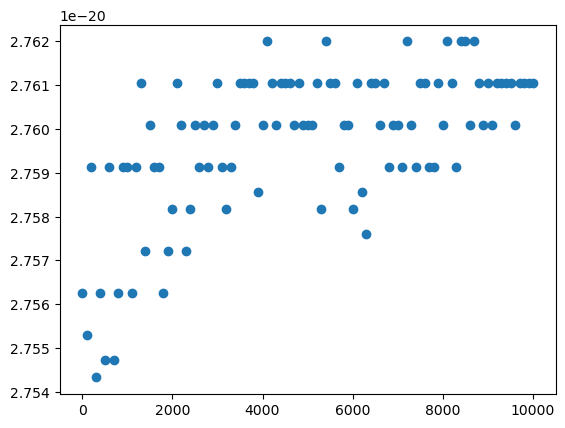

In [51]:
import numpy as np
import matplotlib.pyplot as plt

N = np.linspace(0,10000,101) # the number of inputs has to match up with the number of entropy values calculated in (d), I chose 101 because it made Nupdate a cleaner value in (d)
E = entropyList

fig, ax = plt.subplots()

ax.set_xlabel(r'$N$', fontsize=20) # set the x label
ax.set_ylabel(r'$S$', fontsize=20) # set the y label
ax.set_title('Entropy vs. Number of Walks', fontsize=20) # set the title 

ax.scatter(N,E)

I think this is a reasonable result. With the relatively small number of particles spread out over a large space, even in the intial configuration there is already a fairly low chance that a particular particle will share a cell with another. But of course a few particles will occupy the same state. As the particles progress along their walk, the likelyhood of two particles occupying the same cell drops further still, and the lower entropy states become less and less likely.

(f) BONUS: Plot the density in one dimension for $N=0, 250, 1000, 20000, 10000$ steps.